In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from fastai.vision import *

In [ ]:
path="/content/drive/My Drive/Clasificacion-Pistas/Version_3/Imagenes_V5/"
np.random.seed(5)
data = ImageDataBunch.from_folder(path+'.',
                                  train=path+'.',
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(),
                                  size=224,
                                  num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Descascaramiento de Junta',
 'Descascarimento de esquina',
 'Grieta de esquina']

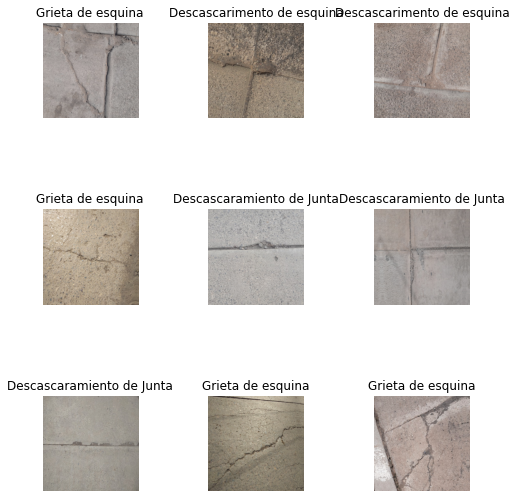

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
from fastai.metrics import error_rate
learn = cnn_learner(data, models.resnet18, metrics=accuracy,model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.553951,1.577360,0.507042,01:12


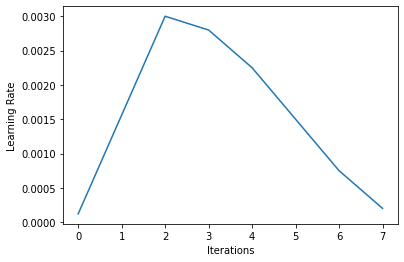

In [ ]:
#Aprendizaje de un ciclo
learn.recorder.plot_lr ()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


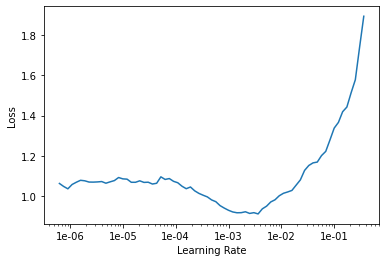

In [ ]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
#lr = 0.001
lr_min = 1e-4
lr_max = 1e-2
learn.fit_one_cycle(10,slice(lr_min,lr_max))
#learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.148433,1.128385,0.633803,00:13
1,0.997564,0.921108,0.746479,00:13
2,0.866246,0.934278,0.781690,00:13
3,0.768422,1.068193,0.781690,00:13
4,0.659948,0.803084,0.795775,00:13
5,0.562676,0.538307,0.852113,00:13
6,0.478649,0.559930,0.830986,00:13
7,0.413341,0.428631,0.866197,00:13
8,0.357806,0.426001,0.880282,00:13
9,0.305121,0.424549,0.880282,00:13


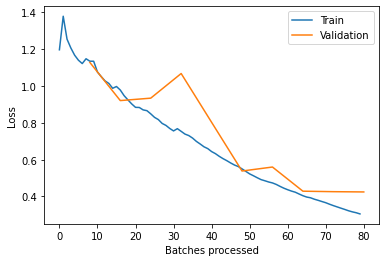

In [ ]:
learn.recorder.plot_losses()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

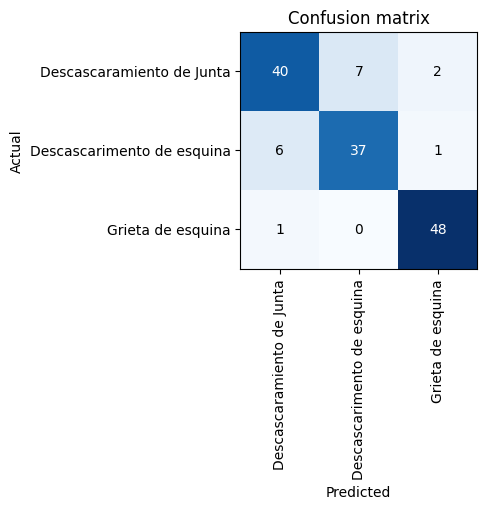

In [ ]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
learn.export("/content/drive/My Drive/Clasificacion-Pistas/Version_3/Modelos/ResNet18-2.pkl")